In [2]:
# Importing Library
from datasets import load_dataset
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset['train'].to_pandas()

# Dataset Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
data = {
    'job_skills' : ['python', 'sql', 'java', 'c++', 'c#', 'javascript', 'html', 'css', 'php', 'ruby'],
    'skill_count' : [30, 25, 20, 15, 10, 5, 4, 3, 2, 1],
    'skill_play' : [100, 90, 80, 70, 60, 50, 40, 30, 20, 10]
}

df_demo = pd.DataFrame(data)

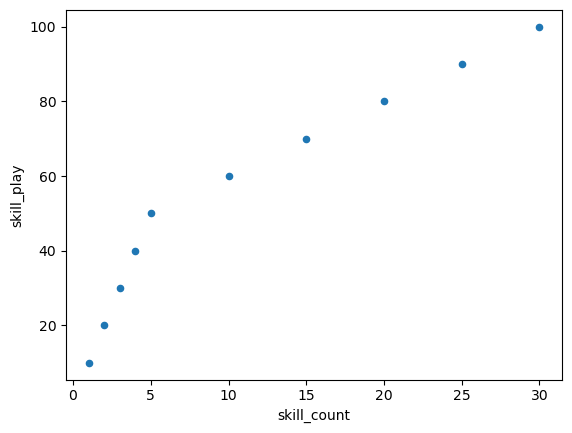

In [4]:
# Plotting the scatter plot
df_demo.plot(kind='scatter', x='skill_count', y='skill_play')
plt.show()

In [5]:
df = df[df['job_title_short'] == 'Data Analyst']

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}


In [6]:
df_explode = df.explode('job_skills')
df_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [7]:
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

skill_stats

,skill_count,median_salary
job_skills,,
airflow,2002,111175.0
airtable,88,90000.0
alteryx,4570,105000.0
angular,376,109101.0
angular.js,2,NaN
...,...,...
wrike,39,75000.0
wsl,16,NaN
xamarin,2,NaN


In [8]:
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,skill_count,median_salary
job_skills,,
sql,92428,92500.0
excel,66860,84479.0
python,57190,98500.0
tableau,46455,95000.0
power bi,39380,90000.0
r,29996,92527.5
sas,27998,90000.0
powerpoint,13822,85000.0
word,13562,80000.0


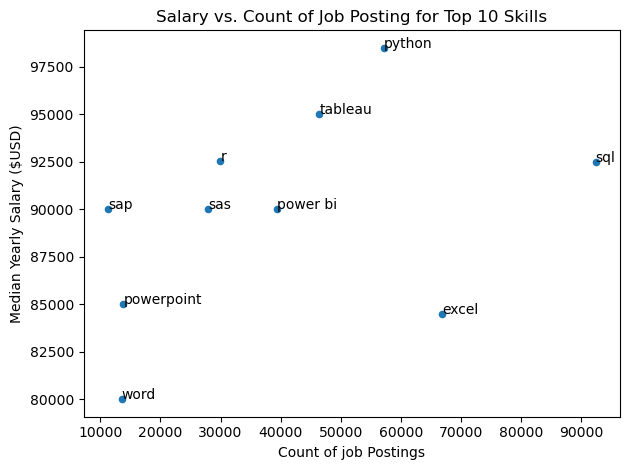

In [14]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.xlabel('Count of job Postings')
plt.ylabel('Median Yearly Salary ($USD)')
plt.title("Salary vs. Count of Job Posting for Top 10 Skills")
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.tight_layout()
plt.show()

# Practise Question

In [15]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [24]:
df = df[df['job_title_short'] == 'Data Scientist']

df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC","[sql, python, r, mongodb, mongodb, sql server,...","{'analyst_tools': ['excel'], 'cloud': ['azure'..."
17,Data Scientist,Data Science Team Lead,"Laurel, MD",via APL Careers - Johns Hopkins University App...,Full-time,False,Georgia,2023-06-13 13:25:17,False,True,United States,None,NaN,NaN,Johns Hopkins Applied Physics Laboratory,"[go, apl, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
19,Data Scientist,Data Scientist,"Pune, Maharashtra, India",via Indeed,Full-time,False,India,2023-04-26 13:20:12,False,False,India,None,NaN,NaN,Bitwise Solutions,"[r, sql, python, scala, java, c++, hadoop, tab...","{'analyst_tools': ['tableau'], 'libraries': ['..."
20,Data Scientist,Data Scientist,"Zaventem, Belgium",via BeBee Belgique,Full-time,False,Belgium,2023-01-31 13:53:38,False,False,Belgium,None,NaN,NaN,Devoteam,"[r, python, sql, pandas, numpy, scikit-learn, ...","{'libraries': ['pandas', 'numpy', 'scikit-lear..."
21,Data Scientist,Stage - data scientist – génération ia de donn...,"Asnières-sur-Seine, France",via Jobijoba,Full-time,False,France,2023-02-23 13:41:21,False,False,France,None,NaN,NaN,Credit Agricole,None,None


In [25]:
# Median Yearly Salary vs. Job Count

df_explode = df.explode('job_skills')

df_explode

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",sql,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",python,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",r,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
9,Data Scientist,Data Scientist II,Anywhere,via ZipRecruiter,Full-time,True,"New York, United States",2023-04-23 13:02:57,False,False,United States,None,NaN,NaN,"Radwell International, LLC",mongodb,"{'analyst_tools': ['excel'], 'cloud': ['azure'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,bigquery,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gdpr,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,git,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."
785725,Data Scientist,Analytics Engineer,Jerman,melalui Startup Jobs,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,Planet,gitlab,"{'cloud': ['bigquery'], 'libraries': ['gdpr'],..."


In [26]:
skill_stats = df_explode.groupby('job_skills').agg(
    skill_count=('job_skills', 'count'),
    median_salary=('salary_year_avg', 'median')
)

skill_stats

,skill_count,median_salary
job_skills,,
airflow,3915,157000.0
airtable,65,215500.0
alteryx,2068,115000.0
angular,736,93500.0
angular.js,12,NaN
...,...,...
wrike,8,NaN
wsl,31,NaN
xamarin,5,NaN


In [29]:
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,skill_count,median_salary
job_skills,,
python,113711,130500.0
sql,78982,132500.0
r,59566,125000.0
sas,29534,119000.0
tableau,29445,125000.0
aws,26256,132500.0
spark,24286,135000.0
azure,21664,127500.0
tensorflow,19153,140000.0


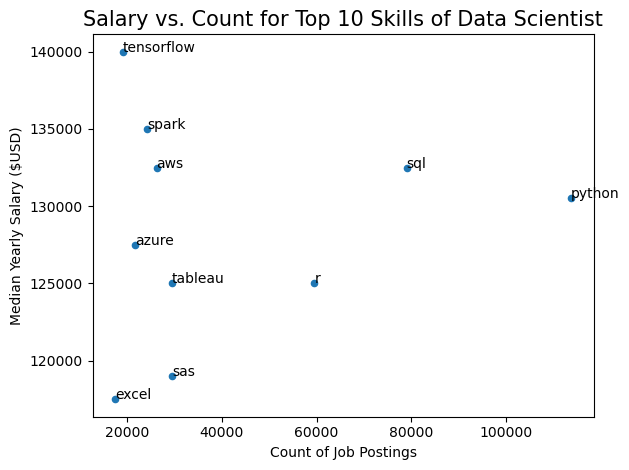

In [36]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.title("Salary vs. Count for Top 10 Skills of Data Scientist", fontsize=15)
plt.xlabel("Count of Job Postings")
plt.ylabel("Median Yearly Salary ($USD)")
for i, label in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], label)
plt.tight_layout()
plt.show()

In [37]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [38]:
# Top 7 Countries by Median Yearly Salary vs Job Count
df = df[df['job_title_short'] == 'Data Analyst']
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
12,Data Analyst,Stagiaire Data Analyst (H/F) - Lyon (69006),"Lyon, France",via Jobijoba,Full-time and Internship,False,France,2023-12-22 13:24:41,False,False,France,None,NaN,NaN,Engie,"[sql, php, excel, power bi, sap, jira]","{'analyst_tools': ['excel', 'power bi', 'sap']..."
18,Data Analyst,Data Analyst,"Warsaw, Poland",via Praca Trabajo.org,Full-time,False,Poland,2023-10-16 13:36:54,False,False,Poland,None,NaN,NaN,Glovo,"[sql, python, r, redshift, pandas, excel, look...","{'analyst_tools': ['excel', 'looker', 'tableau..."
31,Data Analyst,Stage - Data Analyst F/H,"Paris, France",via LinkedIn,Full-time and Internship,False,France,2023-10-19 13:59:31,False,False,France,None,NaN,NaN,GROUPE BON MARCHÉ : Le Bon Marché Rive Gauche ...,[sql],{'programming': ['sql']}
34,Data Analyst,Data Analyst als Marketing Manager Automation ...,"Erlangen, Germany",via Central Illinois Proud Jobs,Full-time,False,Germany,2023-02-23 13:31:28,True,False,Germany,None,NaN,NaN,DEFACTO GmbH,[sap],{'analyst_tools': ['sap']}


In [39]:
df_explode = df.explode('job_skills')
df_explode.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,r,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,python,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,sql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,nosql,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,power bi,"{'analyst_tools': ['power bi', 'tableau'], 'pr..."


In [48]:
job_country_count = df_explode.groupby('job_country').agg(
    median_salary = ('salary_year_avg', 'median'),
    job_count = ('job_country', 'size')
)

job_country_count = job_country_count.sort_values(by='job_count', ascending=False).head(7)
job_country_count

,median_salary,job_count
job_country,,
United States,90000.0,254289
France,89100.0,45238
United Kingdom,89100.0,29825
Singapore,100500.0,24822
India,102500.0,23525
Germany,105650.0,20418
Spain,98500.0,18701


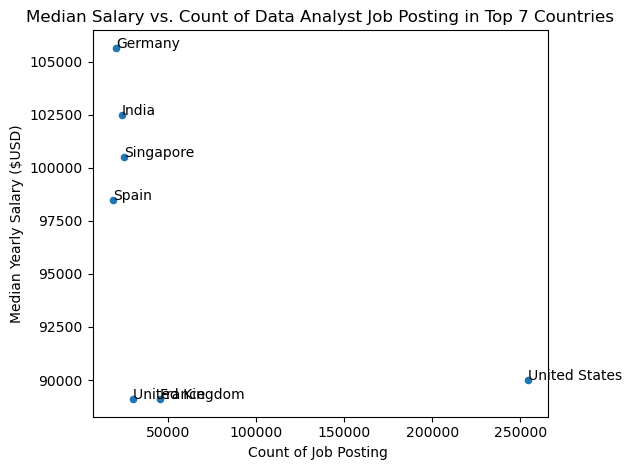

In [52]:
job_country_count.plot(kind='scatter', x='job_count', y='median_salary')
for i, label in enumerate(job_country_count.index):
    plt.text(job_country_count['job_count'].iloc[i], job_country_count['median_salary'].iloc[i], label)
plt.title("Median Salary vs. Count of Data Analyst Job Posting in Top 7 Countries")
plt.xlabel("Count of Job Posting ")
plt.ylabel("Median Yearly Salary ($USD)")
plt.tight_layout()
plt.show()

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [74]:
df_copy = df.copy()
df_copy.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [75]:
# df_explode = df_copy.explode('job_skills')
# df_explode

In [76]:
salary_and_job_count = df_copy.groupby(['job_title_short', 'job_schedule_type']).agg(
    average_salary = ('salary_year_avg', 'mean'),
    job_count = ('job_posted_date', 'size')
)

salary_and_job_count

average_salary  job_count
job_title_short   job_schedule_type                                   
Business Analyst  Contractor                   87129.583333       1693
                  Contractor and Internship             NaN          6
                  Contractor and Per diem               NaN          1
                  Contractor and Temp work     75000.000000        100
                  Full-time                    91493.343885      44106
...                                                     ...        ...
Software Engineer Per diem                              NaN          1
                  Temp work                             NaN        120
                  Temp work and Full-time               NaN          1
                  Temp work and Internship              NaN          4
                  Volunteer                             NaN          1

[263 rows x 2 columns]

In [77]:
df_salary_and_job_count = salary_and_job_count.reset_index()

df_salary_and_job_count.sort_values(by='job_count', ascending=False, inplace=True)

df_salary_and_job_count

,job_title_short,job_schedule_type,average_salary,job_count
56,Data Analyst,Full-time,94343.002423,168975
94,Data Engineer,Full-time,129704.718197,165225
127,Data Scientist,Full-time,136760.215926,153278
4,Business Analyst,Full-time,91493.343885,44106
239,Software Engineer,Full-time,114021.716065,42314
...,...,...,...,...
174,Machine Learning Engineer,Part-time and Full-time,198000.000000,1
41,Cloud Engineer,"Full-time, Part-time, and Internship",NaN,1
173,Machine Learning Engineer,Part-time and Contractor,NaN,1
229,Senior Data Scientist,Kontraktor,NaN,1


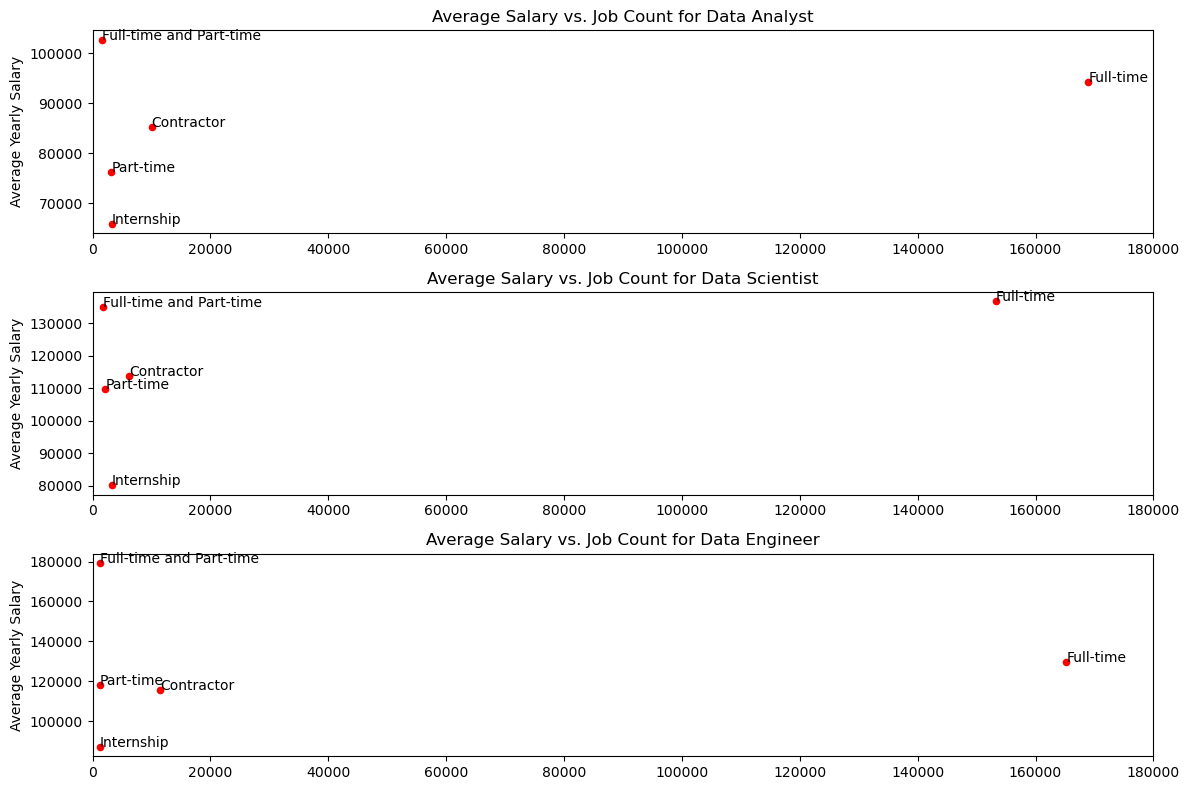

In [97]:
target_job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

fig, ax = plt.subplots(3, 1, figsize=(12, 8))

for i, job_title in enumerate(target_job_titles):
    df_plot = df_salary_and_job_count[df_salary_and_job_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='scatter', x='job_count', y='average_salary', title=f"Average Salary vs. Job Count for {job_title}" , ax=ax[i], color='red')
    for j, label in enumerate(df_plot['job_schedule_type']):
        ax[i].text(df_plot['job_count'].iloc[j], df_plot['average_salary'].iloc[j], label)
    ax[i].set_xlim(0, 180000)
    ax[i].set_xlabel("")
    ax[i].set_ylabel("Average Yearly Salary")
    
fig.tight_layout()
plt.show()
fig.savefig("Scatter Plot of Average Salary and Job Count of Job List")